In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./hot-dog-survey-data/hot_dog_survey_spring25.xlsx - Form Responses 1.csv')
df.head(10)

,Timestamp,Do you believe that a hotdog falls under the category of a sandwich?,What is the rationale behind your opinion?,Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?,What is your field of study or major?,What state or country were you born in?,"If you are an undergraduate, what is your current academic year?",Gender: How do you identify?,"You preferred to self-describe for gender; please, share your identity below"
0,1/15/2025 21:53:05,No,The content inside isn’t covered u can see the...,Yes,Applied statistics with data science conc + da...,"VA, USA",Third year,Woman,NaN
1,1/15/2025 21:53:51,No,"Sandwich bread is two separate slices, hotdog ...",Yes,Economics/Pre-Comm,"Virginia, United States of America",Second year,Woman,NaN
2,1/15/2025 21:54:43,No,the bread is connected,Yes,biology,virginia,Third year,Woman,NaN
3,1/15/2025 21:56:43,Yesss,It is a piece of meat encapsulated by bread! I...,Yes,Biology and Psychology,Virginia,Fourth year,Woman,NaN
4,1/15/2025 21:57:59,NO,A hot dog is not a sandwich because its openin...,Yes,Nursing,Virginia,Second year,Woman,NaN
5,1/15/2025 21:59:34,Yes,Is a load cut in half and loaded with somethin...,Yes,Mechanical engineering,Vietnam,Second year,Woman,She her
6,1/15/2025 21:59:52,No,It's does not have two slices of bread around it,Yes,Biochemistry,Ghana,First year,Woman,NaN
7,1/15/2025 22:00:02,No,"when you take away the bread/bun, the contents...",Yes,women gender and sexuality studies,"virginia, u.s",Fourth year,Woman,NaN
8,1/15/2025 22:00:08,Nope,The bread is connected,Yes,Pre Med,United States,First year,Man,NaN
9,1/15/2025 22:00:33,Yes,"Idk, seems right\nalso, 2 bread w/ stuff in it",Yes,Physics + Mathematics,Louisiana,Second year,Man,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Timestamp                                                                                          64 non-null     object
 1   Do you believe that a hotdog falls under the category of a sandwich?                               64 non-null     object
 2   What is the rationale behind your opinion?                                                         61 non-null     object
 3   Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?  64 non-null     object
 4   What is your field of study or major?                                                              61 non-null     object
 5   What

In [4]:
df['Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?'].value_counts()

Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?
Yes    58
No      6
Name: count, dtype: int64

In [5]:
df = df[df['Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?'] == 'Yes']

In [6]:
df['Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?'].value_counts()

Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?
Yes    58
Name: count, dtype: int64

In [7]:
df['If you are an undergraduate, what is your current academic year?'].value_counts()

If you are an undergraduate, what is your current academic year?
Fourth year    24
Third year     16
Second year     9
First year      5
Name: count, dtype: int64

In [8]:
df = df[df['If you are an undergraduate, what is your current academic year?'].notna()]

In [9]:
df['If you are an undergraduate, what is your current academic year?'].value_counts()

If you are an undergraduate, what is your current academic year?
Fourth year    24
Third year     16
Second year     9
First year      5
Name: count, dtype: int64

In [10]:
df['Do you believe that a hotdog falls under the category of a sandwich?'].value_counts()

Do you believe that a hotdog falls under the category of a sandwich?
No           24
Yes          12
NO            3
YES           2
Yes           2
yes           2
no            2
Yesss         1
Nope          1
N             1
Noooo         1
Yesssssss     1
Y             1
No            1
Name: count, dtype: int64

In [11]:
# replace values NO, N, no, Nope, Noooo with No
response = 'Do you believe that a hotdog falls under the category of a sandwich?'
df[response] = df[response].replace(['NO', 'N', 'no', 'Nope', 'Noooo', 'No '], 'No')
df[response] = df[response].replace(['YES', 'yes', 'Yesss', 'Yeah', 'Yesssssss', 'Y', 'Yes '], 'Yes')

In [12]:
df['Do you believe that a hotdog falls under the category of a sandwich?'].value_counts()

Do you believe that a hotdog falls under the category of a sandwich?
No     33
Yes    21
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 63
Data columns (total 9 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Timestamp                                                                                          54 non-null     object
 1   Do you believe that a hotdog falls under the category of a sandwich?                               54 non-null     object
 2   What is the rationale behind your opinion?                                                         52 non-null     object
 3   Are you currently enrolled as an undergraduate or graduate student at the University of Virginia?  54 non-null     object
 4   What is your field of study or major?                                                              53 non-null     object
 5   What stat

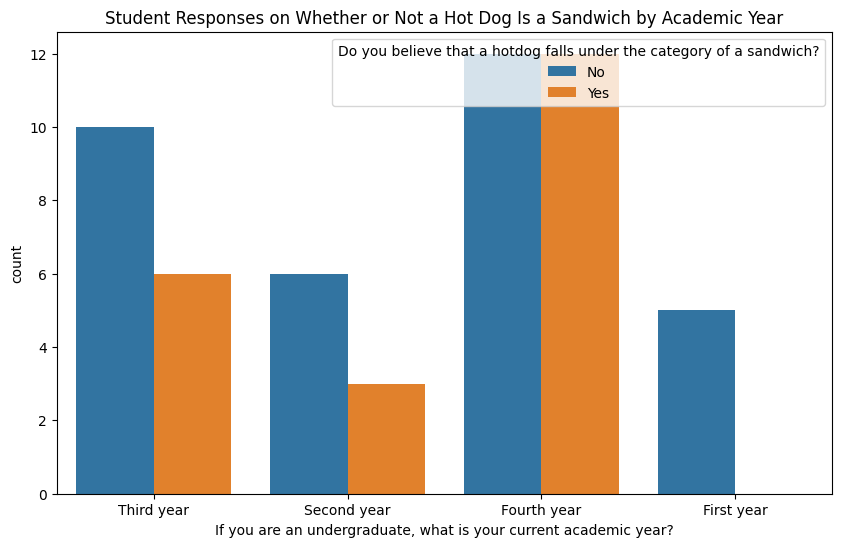

In [33]:
# make a grouped by chart by year (to show how many people from each year answered yes or no), using seaborn (add more space in the margin between legend and graph)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='If you are an undergraduate, what is your current academic year?', hue='Do you believe that a hotdog falls under the category of a sandwich?')
plt.title('Student Responses on Whether or Not a Hot Dog Is a Sandwich by Academic Year')
plt.show()

In [34]:
filtered_df = df[df['If you are an undergraduate, what is your current academic year?'] == 'Fourth year']
filtered_df['Do you believe that a hotdog falls under the category of a sandwich?'].value_counts()

Do you believe that a hotdog falls under the category of a sandwich?
Yes    12
No     12
Name: count, dtype: int64